<a href="https://colab.research.google.com/github/rohitpawar4507/LP3_ML/blob/main/Ass4_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Assignment 4
#  Assignment on K-Means Clustering:
# @ Rohit Pawar 

In [23]:
#Load the required Libraries 
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
#Given Dataset
dataset = {
'Points':['P1','P2','P3','P4','P5','P6','P7','P8',],
'x_coordinate':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
'y_coordinate':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]
}

In [25]:
#dataframe
df = pd.DataFrame(dataset,columns=['Points','x_coordinate','y_coordinate'])

In [26]:
df #print dataset

,Points,x_coordinate,y_coordinate
0,P1,0.10,0.60
1,P2,0.15,0.71
2,P3,0.08,0.90
3,P4,0.16,0.85
4,P5,0.20,0.30
5,P6,0.25,0.50
6,P7,0.24,0.10
7,P8,0.30,0.20


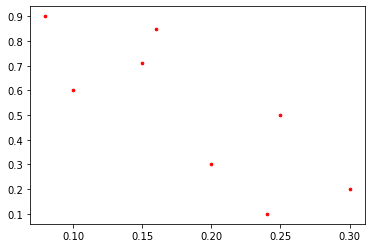

In [27]:
# Getting the values and plotting it
f1 = df['x_coordinate'].values
f2 = df['y_coordinate'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)

In [28]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [29]:
# Number of clusters
k = 2
# Two initia Centroids are given
# m1 = P1
# m2 = P8
Centroid_m1 = list(X[0])
Centroid_m2 = list(X[7])
Centroids = np.array([Centroid_m1,Centroid_m2])
print(Centroids)

[[0.1 0.6]
 [0.3 0.2]]


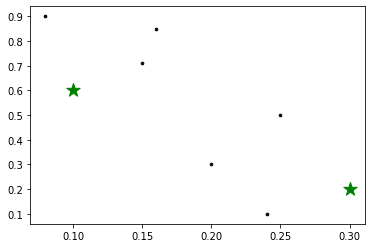

In [30]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(Centroid_m1[0],Centroid_m1[1] ,marker='*', s=200, c='g')
plt.scatter(Centroid_m2[0],Centroid_m2[1] ,marker='*', s=200, c='g')

In [31]:
# To store the value of centroids when it updates
C_old = np.zeros(Centroids.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(Centroids, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], Centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(Centroids)
    print(C_old)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        Centroids[i] = np.mean(points, axis=0)
        print(Centroids[i])
    error = dist(Centroids, C_old, None)

[[0.1 0.6]
 [0.3 0.2]]
[0.148 0.712]
[0.24666667 0.2       ]
[[0.148      0.712     ]
 [0.24666667 0.2       ]]
[0.148 0.712]
[0.24666667 0.2       ]


New centroids are : 
[0.24666667 0.2       ]
For centroid 0
[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.25 0.5 ]]
For centroid 1
[[0.2  0.3 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


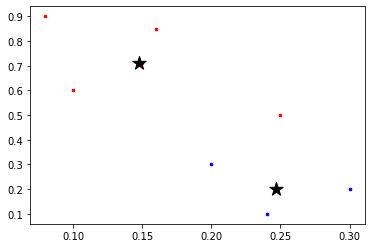

In [32]:
colors = ['r', 'b']
fig, ax = plt.subplots()
print("New centroids are : ")
print(Centroids[1])

#print("**")
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        print("For centroid",i)
        print(points)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

ax.scatter(Centroids[:, 0], Centroids[:, 1], marker='*', s=200, c='#050505')

In [33]:
"""#updated value of m1 and m2 is:
# Answer
M1 = [0.2475  0.275]
M2 = [0.1225  0.765]"""

'#updated value of m1 and m2 is:\n# Answer\nM1 = [0.2475  0.275]\nM2 = [0.1225  0.765]'